In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

In [3]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

In [4]:
# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

In [5]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1

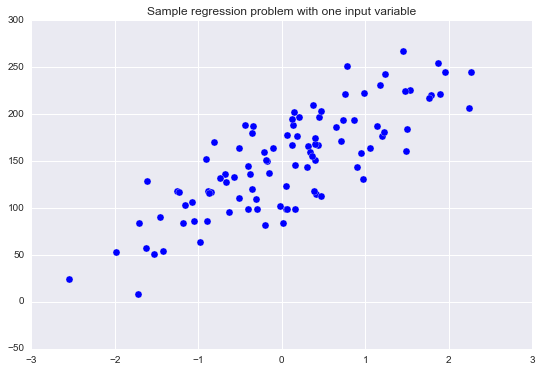

In [6]:
# synthetic dataset for simple regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

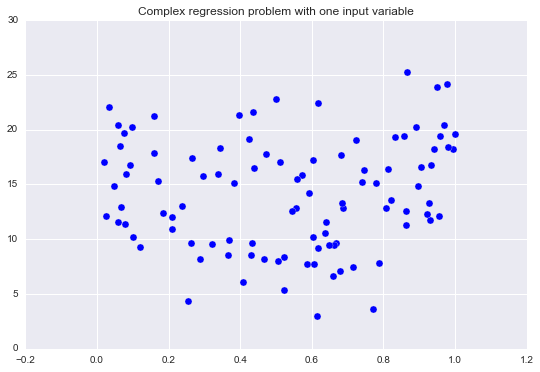

In [7]:
# synthetic dataset for more complex regression
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

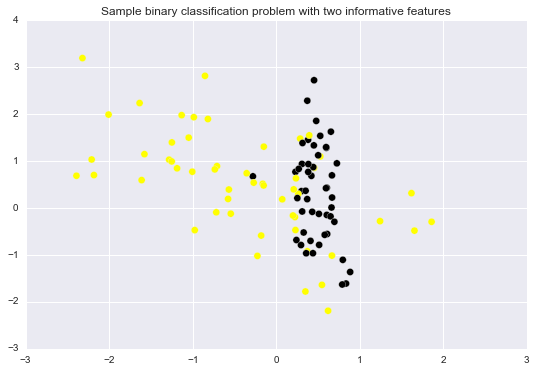

In [8]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

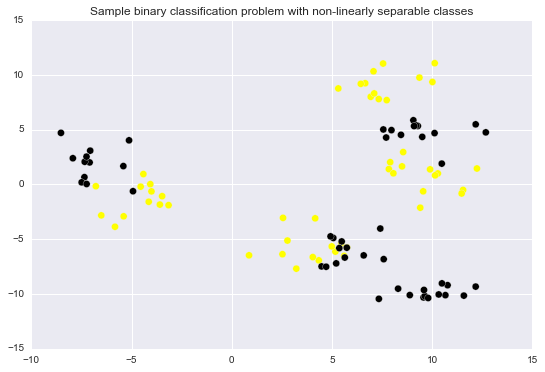

In [9]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [10]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [11]:
from sklearn.naive_bayes import GaussianNB
xtrain, xtest , ytrain, ytest = train_test_split(X_cancer, y_cancer, random_state=0)
nbclf = GaussianNB().fit(xtrain, ytrain)

In [13]:
print "Breast cancer dataset."
print "Accuracy of Gaussian Naive Bayes on training set:", nbclf.score(xtrain, ytrain)
print "Accuracy of Gaussian Naive Bayes on test set:", nbclf.score(xtest, ytest)

Breast cancer dataset.
Accuracy of Gaussian Naive Bayes on training set: 0.950704225352
Accuracy of Gaussian Naive Bayes on test set: 0.937062937063


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = RandomForestClassifier(max_features=8, random_state=0)
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [19]:
print "Breast cancer dataset with Random Forest Classifier."
print "Accuracy of Random Forest classifier on training set:", clf.score(xtrain, ytrain)
print "Accuracy of Random Forest classifier on test set:", clf.score(xtest, ytest)

Breast cancer dataset with Random Forest Classifier.
Accuracy of Random Forest classifier on training set: 0.995305164319
Accuracy of Random Forest classifier on test set: 0.986013986014


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(xtrain, ytrain)
print "Breast cancer dataset, learning rate = 0.1, max depth = 3."
print "Accuracy on training set:", clf.score(xtrain, ytrain)
print "Accuracy on test set:", clf.score(xtrain, ytrain)

Breast cancer dataset, learning rate = 0.1, max depth = 3.
Accuracy on training set: 1.0
Accuracy on test set: 1.0


In [23]:
clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(xtrain, ytrain)
print "Breast cancer dataset, learning rate = 0.01, max depth = 2."
print "Accuracy on training set:", clf.score(xtrain, ytrain)
print "Accuracy on test set:", clf.score(xtrain, ytrain)

Breast cancer dataset, learning rate = 0.01, max depth = 2.
Accuracy on training set: 0.974178403756
Accuracy on test set: 0.974178403756


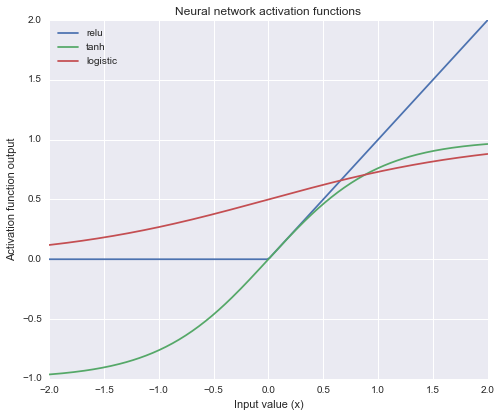

In [26]:
xs = np.linspace(-2, 2, 200)

plt.figure(figsize=(7, 6));
plt.plot(xs, np.maximum(xs, 0), label="relu");
plt.plot(xs, np.tanh(xs), label = "tanh");
plt.plot(xs, 1.0/(1.0 + np.exp(-xs)), label="logistic");
plt.legend(loc = "upper left");
plt.title("Neural network activation functions");
plt.xlabel("Input value (x)");
plt.ylabel("Activation function output");

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [30]:
cancer = load_breast_cancer()
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

In [32]:
scaler = MinMaxScaler()
xtrain, xtest, ytrain, ytest = train_test_split(X_cancer, y_cancer, random_state=0)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)
clf = MLPClassifier(hidden_layer_sizes=[100, 100], alpha=5.0, random_state=0, solver="lbfgs").fit(xtrain, ytrain)

In [34]:
print "Breast cancer dataset with Neural network."
print "Accuracy of Neural network on training set:", clf.score(xtrain, ytrain)
print "Accuracy of Neural network on test set:", clf.score(xtest, ytest)

Breast cancer dataset with Neural network.
Accuracy of Neural network on training set: 0.983568075117
Accuracy of Neural network on test set: 0.895104895105
